In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
from PIL import Image
import glob

### [함수 정의] 학습용 데이터 리사이즈 함수 

In [3]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

### 학습용 데이터 리사이즈 하기

In [4]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor_1"
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock_1"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper_1"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

300  images to be resized.
300  images resized.
가위 이미지 resize 완료!
300  images to be resized.
300  images resized.
바위 이미지 resize 완료!
300  images to be resized.
300  images resized.
보 이미지 resize 완료!


### [함수 정의] 가위, 바위, 보 데이터를 읽을 수 있는 load_data() 함수  
- 이 코드를 활용하면 임의의 사진 데이터에 적용 가능
- load_data() 함수는 입력으로 이미지가 있는 폴더 위치 필요. 여기서는 rock_scissor_paper 폴더 위치
- 가위바위보의 경우 3개의 클래스 즉, 가위: 0, 바위: 1, 보: 2 로 라벨링

In [5]:
def load_data(img_path, number_of_data=900):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor_1/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock_1/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper_1/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

### 학습용 데이터 읽어오기
- load_data() 함수는 입력으로 이미지가 있는 폴더 위치 필요  
- aiffel/rock_scissor_paper 폴더 아래에 가위, 바위, 보 각각에 대한 폴더를 생성해서 이미지 저장

In [6]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 900 입니다.
x_train shape: (900, 28, 28, 3)
y_train shape: (900,)


### 이미지 확인하기

라벨:  0


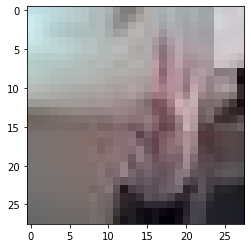

In [7]:
plt.imshow(x_train[100])
print('라벨: ', y_train[100])

### 딥러닝 모델 설계
다음의 파라미터 값을 바꾸면서 정확도를 올리는 파라미터들을 찾는다:
- n_channel_1   (=16)  
- n_channel_2   (=128)  
- n_dense       (=1024)  
- n_train_epoch (=9)

In [98]:
# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?

n_channel_1 = 16
n_channel_2 = 128
n_dense = 1024
n_train_epoch = 8

# [16, 128, 1024] 9: 최대 66%

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 11, 11, 128)       18560     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 3200)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 1024)              3277824   
_________________________________________________________________
dense_43 (Dense)             (None, 3)               

### 딥러닝 모델 학습

In [99]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

Epoch 1/8
29/29 [==============================] - 0s 4ms/step - loss: 32.2323 - accuracy: 0.5467
Epoch 2/8
29/29 [==============================] - 0s 4ms/step - loss: 0.3412 - accuracy: 0.8633
Epoch 3/8
29/29 [==============================] - 0s 3ms/step - loss: 0.0850 - accuracy: 0.9811
Epoch 4/8
29/29 [==============================] - 0s 4ms/step - loss: 0.0269 - accuracy: 0.9967
Epoch 5/8
29/29 [==============================] - 0s 3ms/step - loss: 0.0365 - accuracy: 0.9889
Epoch 6/8
29/29 [==============================] - 0s 4ms/step - loss: 0.0423 - accuracy: 0.9900
Epoch 7/8
29/29 [==============================] - 0s 3ms/step - loss: 0.3161 - accuracy: 0.9133
Epoch 8/8
29/29 [==============================] - 0s 3ms/step - loss: 0.0218 - accuracy: 0.9956


### 얼마나 잘 만들었는지 확인하기 - 테스트 데이터 만들기
- 테스트 데이터 리사이즈  
- 테스트 데이터와 학습용 데이터는 위치한 폴더와 갯수와 다르므로 테스트 데이터 로드 함수 정의  
- 테스트 데이터 정규화

In [100]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

# 테스트 데이터 로드 함수
def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트 데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
테스트 데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


### 훈련시킨 모델 성능 평가 - Accuracy 측정

In [101]:
# model을 평가하는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.

test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 5.8737 - accuracy: 0.4600
test_loss: 5.873671054840088 
test_accuracy: 0.46000000834465027


### Confusion matrix 확인

In [102]:
from tensorflow.math import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd

y_pred = np.argmax(model.predict(x_test_norm), axis=1) # 예측결과(각 샘플 당 3개) 중 가장 높은 값
                                                         # 이 값이 결국 클래스를 의미
_confusion_report = classification_report(y_test, y_pred, 
                                          target_names=['scissor', 'rock', 'paper'], 
                                          output_dict=True) # dict 형태로 출력(dataframe 만들기 위해)
pd.DataFrame(_confusion_report)

,scissor,rock,paper,accuracy,macro avg,weighted avg
precision,0.875000,0.362963,0.214286,0.383333,0.484083,0.484083
recall,0.140000,0.980000,0.030000,0.383333,0.383333,0.383333
f1-score,0.241379,0.529730,0.052632,0.383333,0.274580,0.274580
support,100.000000,100.000000,100.000000,0.383333,300.000000,300.000000


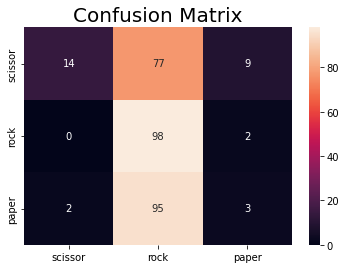

In [103]:
import seaborn as sns

_confusion_matrix = confusion_matrix(y_test, y_pred) # Confusion Matrix 만들기
df_confusion = pd.DataFrame(_confusion_matrix.numpy(),
                           columns=['scissor', 'rock', 'paper'],
                           index=['scissor', 'rock', 'paper'])
sns.heatmap(df_confusion, annot=True, fmt='g') # Confusion Matrix를 heatmap으로 시각화
plt.title('Confusion Matrix', fontsize=20)
plt.show()

### 해석

- 다음의 파라미터 값들을 바꾸면서 정확도를 확인
  - n_channel_1   (= 16, 교재 기본 값)  
  - n_channel_2   (= 32, 교재 기본 값)  
  - n_dense       (= 32, 교재 기본 값)  
  - n_train_epoch (= 10, 교재 기본 값)  
      
      
- 훈련 데이터 수를 가위, 바위 보 각 100개씩 총 300개를 사용했을 경우
      - n_channel_1   = 16  
      - n_channel_2   = 128  
      - n_dense       = 512  
      - n_train_epoch = 8  
      
  - 위 파라미터 사용 시 최대 정확도 59% 기록  
  - 같은 파라미터를 사용하더라도 학습시킬 때마다 **결과가 다름**... 이유는 모르겠음  
  - 각 층의 채널 수를 무작정 높여서 정확도가 높아지는 것은 아님  
  - 동일한 채널 파라미터에 대해 Epoch수는 일정 수준을 넘어가면 정확도 감소: 위의 경우 9부터 감소  
  - 최적의 파라미터는 Trial-and-Error로 찾기는 불가능하며 수리적 방법이나 경험적 방법으로 찾아야 할 것으로 보임  
  
      
- 훈련 데이터 수를 가위, 바위 보 각 300개씩 총 900개를 사용했을 경우 (300개 새로 찍고, 동료 사진 300개 추가)
      - n_channel_1   = 16  
      - n_channel_2   = 128  
      - n_dense       = 1024  
      - n_train_epoch = 9  
      
  - 위 파라미터 사용 시 최대 정확도 66% 기록    
  - 같은 파라미터를 사용하더라도 학습시킬 때마다 **결과가 다름**... 이유는 모르겠음
  - 훈련(학습) 데이터 수가 300인 경우와 정확도는 별 차이가 없으며 낮은 수준임
  - 데이터 수를 더 늘려서 해보는 것이 필요할 것 같음
  - 물론 데이터 수에 정확도가 비례할 것으로 보이지는 않으나 900개도 매우 적은 것으로 판단됨
